## 들어가며
---

**시즌1과 시즌2에서 훌륭한 코드를 공유해주신 모든 분들께 감사드리며
특히 시즌1 과정 중 이산님께서 공유해주신 코드에 많은 도움을 받았습니다. <br>
<br><br>
시즌2에서 그저 운이 좋아 좋은 결과를 얻었다고 생각하기 때문에 부족한 코드를 올리기 굉장히 부끄럽습니다만, <br>
이왕 코드를 공유할 기회를 얻었으니 제 코드가 시즌3에 참여하시는 분들의 아이디어에 조금이라도 도움이 되었으면 좋겠다는 마음으로 작성해보았습니다.**

---


## 
## 개요
### 
### 개략적인 아이디어

시즌2에서 구현하고자 한 아이디어는 **<최적의 투자방법 찾기+Overfitting을 최대한 피하는 모델 찾기>** 였습니다.<br><br>
복잡한 시계열 모델을 충분히 다룰 능력이 없었고, 마침 __대회의 목표가 시계열 예측 자체가 아닌 최대 투자금 달성__으로 <br><br>
투자방식에 대한 자유가 있었기 때문에 투자방법을 최적화해보려 노력했습니다.

간단히 말해 __투자 방법 최적화 + 예측 모델 최적화__ 둘 모두를 시도하면 좋은 결과를 얻을 수 있지 않을까? 하는 생각을 기반으로 했습니다.
### 
### 투자방법

투자의 경우 
1. 얼마나 매수해서 (buy_quantity) 
2. 언제 매도할지 (sell_time) 
3. 어떤 sample 에 투자할지 결정해야했습니다.<br>

이 중 1, 2 번 항목은 submission sample 에 feature 로 직접 드러나있습니다.


__Train set 과 test set 이 지나치게 상이하지 않을 것이라 가정__하고 다양한 투자방법을 train set에서 시험해본 후 <br>
가장 많은 수익을 올린 방식을 test set 투자에 이용하는 것을 기본적인 골조로 삼았습니다.

### 
### 모델선정

모델은 statsmodels(version==0.12.2)의 ARIMA를 사용했습니다.<br>

ARIMA model을 사용한 이유는 다음과 같습니다. <br>
- 시계열 데이터를 잘 다루지 못하기 때문에 단순한 모델로 접근해보고자 했습니다.


- AIC, BIC 등 기준을 이용해 파라미터 튜닝을 할 수 있기 때문에 별도의 validation set을 필요로 하지 않습니다.<br>
  (MAPE(Mean Absolute Percentage Error)를 이용해 train_x_df.csv의 데이터를 train/validation의 형태로 나누어<br>
  ARIMA model을 사용해봤으나 public에서 경험적으로 AIC, BIC보다 좋지 않은 결과를 보였습니다.)  
  
  
- LSTM, GRU 등 ANN이나 1D-CNN을 사용하는 것도 고려대상이었지만 overfitting을 피하도록 tunning 하지 못하였습니다.<br>
  (MAPE를 이용한 ARIMA의 성적이 AIC를 사용하는 것 보다 좋지 않았기 때문에 적절한 validation에 대해 자신하지 못하였습니다.)
  
  
- 주가, 물건 판매량과 같은 전형적인 시계열 데이터와 달리 주기성을 띄지 않는다고 생각하여 SRIMA, Prophet등 주기를 고려하는 <br>
  모델보다 단순한 형태인 ARIMA로 접근하는 것에 무리가 없다고 생각했습니다.
  
  
- 각 sample_id의 open 값의 형태가 서로 상이한 움직임을 보인다고 생각해 하나의 ARIMA 모델로 모든 sample에 대응하기보다 <br>
  sample_id 갯수만큼 ARIMA 모델을 병렬식으로 구성하는 것이 유리하다고 판단했습니다. 
  
###  
### 작업환경에 대하여
**Windows 기반 anaconda spyder**가 저의 기본적인 작업환경이어서 처음으로 Jupyter notebook 포맷으로 옮겨적는 것에 꽤 애를 먹었습니다.

<br>
코드 동작에서 작업시간을 줄이고자 multiprocessing을 사용하였으나 window 기반 jupyter에서는 Linux와 다르게 작동에 문제가 있었습니다. <br>

윈도우 환경에서 코드를 테스트해보실 경우 **바로 아래의 첫 번째 code cell의 주석처리된 함수들을 cust_f.py 라는 이름으로 같은 디렉토리에 <br>
저장해주신 후 실행**하시면 multiprocessing 작동에 문제가 생기지 않으실 것 입니다.  
  
  **Linux의 경우 주석처리를 풀어주시고 script의 cust_f.을 지워주시면** 바로 작동하며 테스트 결과 colab에선 multiprocessing 동작은 문제 없으나 <br> cpu 기반의 연산이기 때문인지 제 pc의 AMD Ryzen 5 3600 보다 처리가 오래걸렸습니다.
  
__맨 하단의 전체 주석처리된 code cell은 windows 기반 anaconda spyder에서 작동하도록 만든 코드입니다.__
 
  
코드 동작에 오류나 이상한점이 있으면 언제든 말씀해주시기 바랍니다. 	&#128515;


## 
## Multiprocessing 관련 코드

In [1]:
# -*- coding: utf-8 -*-
"""
DACON AI Bit Trader Competition Season 2

Main script
"""

'''
Need to save script below as a .py file in the same directory for using custom 
functions while running multiprocessing.pool with window system (Not necessary for linux).

#%% Import modules
import itertools as it
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller

#%% Custom functions
def multi_adfuller_pval(seq):
    return adfuller(seq)[1]


def train_invest(y_train_open, y_train_mdl, invest_strat, use_weight=False):
    if use_weight:
        buy_q, sell_t, p_thld, weight = invest_strat
    else:
        buy_q, sell_t, p_thld = invest_strat
        weight=None
    
    if len(y_train_mdl) > 1 and weight != None:
        if weight < 0 or weight > 1: 
            print('Weight must from 0 to 1')
            raise ValueError
        elif len(y_train_mdl) > 2:
            print('More than two prediction results are exist')
            raise ValueError
        
        y_train_mdl = weight*y_train_mdl[0] + (1-weight)*y_train_mdl[-1]
        # Change y_train_mdl as a weighted sum of y_train_mdl elements
    
        rslt_invest = calc_train_investment(
            y_train_open, make_submission(y_train_mdl,
                                          buy_q,
                                          sell_t,
                                          profit_thld=p_thld))
        return [buy_q, sell_t, p_thld, weight, rslt_invest[0], rslt_invest[1]]

    rslt_invest = calc_train_investment(
        y_train_open, make_submission(y_train_mdl,
                                      buy_q,
                                      sell_t,
                                      profit_thld=p_thld))
    
    return [buy_q, sell_t, p_thld, rslt_invest[0], rslt_invest[1]]


def calc_train_investment(df_y_open_true, subm):
    money = 10000
    for _idx, _val in subm.iterrows():
        money = money*_val.buy_quantity*\
            df_y_open_true.loc[_val.sell_time, _val.sample_id]*(0.9995)**2 + \
            money*(1-_val.buy_quantity)
    num_invest = len(subm[subm.buy_quantity!=0])
    
    return money, num_invest


def arima_prediction(df_open):
    import warnings
    
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tools.sm_exceptions import ConvergenceWarning
    
    warnings.simplefilter('ignore', ConvergenceWarning) 
    # Ignore convergence warning
    
    p = [1, 2, 4, 6, 8]
    d = q = range(0, 2)
    params_arima = list(it.product(p,d,q))
    
    combs = {}
    aics = []
    
    for i, param in enumerate(params_arima):
        try:
            m = ARIMA(df_open, 
                      order=param,
                      enforce_invertibility=False,
                      enforce_stationarity=False)
            m_fit = m.fit()
            combs.update({m_fit.aic : param})
            aics.append(m_fit.aic)
            
        except: continue
        
    m_arima_best_aic_idx = min(aics)        
    m_arima = ARIMA(df_open,
                    order=combs[m_arima_best_aic_idx],
                    enforce_invertibility=False,
                    enforce_stationarity=False)
    m_arima_fit = m_arima.fit()            
    
    return m_arima_fit.forecast(120)
'''

"\nNeed to save script below as a .py file in the same directory for using custom \nfunctions while running multiprocessing.pool with window system (Not necessary for linux).\n\n#%% Import modules\nimport itertools as it\nimport pandas as pd\nimport numpy as np\n\nfrom statsmodels.tsa.stattools import adfuller\n\n#%% Custom functions\ndef multi_adfuller_pval(seq):\n    return adfuller(seq)[1]\n\n\ndef train_invest(y_train_open, y_train_mdl, invest_strat, use_weight=False):\n    if use_weight:\n        buy_q, sell_t, p_thld, weight = invest_strat\n    else:\n        buy_q, sell_t, p_thld = invest_strat\n        weight=None\n    \n    if len(y_train_mdl) > 1 and weight != None:\n        if weight < 0 or weight > 1: \n            print('Weight must from 0 to 1')\n            raise ValueError\n        elif len(y_train_mdl) > 2:\n            print('More than two prediction results are exist')\n            raise ValueError\n        \n        y_train_mdl = weight*y_train_mdl[0] + (1-weight)*y

### 간단한 함수 설명

* multi_adfuller_pval : 잘 알려진 stationarity check 방식인 ADF test (Augmented Dickey–Fuller test)를 병렬처리하고 <br>그 중 p-value만을 뽑아내기 위한 함수입니다.
<br>
<br>
* train_invest : 총 7661개의 train set sample의 prediction 결과를 통해 최적의 투자방식을 찾고자 했습니다. 반환값은 
    1. 얼마를 투자할 것 인지
    2. 어떤 시점 이후로는 매도를 하면 안될 것 인지 <br>__(시계열 예측이 먼 미래일 수록 부정확하므로 어느정도 범위의 예측값을 신뢰할 것 인지 결정하고자 하였습니다.)__
    3. 예측값의 최대치가 어느정도 이상일 때 투자할 것 인지 <br>__(큰 증가가 예상되는 소수의 sample에 투자할 것 인지, 약간의 상승세만 보여도 투자할 것 인지 결정하는 parameter로 사용하고자 했습니다.)__
    4. 투자 최종 결과 금액
    5. 몇개의 sample_id에 투자했는지 <br>__(지나치게 많거나 적은 경우에 대해 투자를 하고있는 것이 아닌지 모니터링 하는 용도로 사용했습니다.)__<br>



* cal_train_investment : train set 에 모의투자한 결과를 반환하는 함수입니다.
    1. train set에 대한 투자 결과 금액
    2. 몇 개의 sample에 투자했는지에 대한 결과를 반환합니다.


* arima_prediction : 각 sample에 ARIMA 모델을 훈련시키는 전략을 사용하기 위해 cpu 자원을 최대한 사용할 필요가 있어, <br>
  원활한 multiprocessing을 위해 만든 함수입니다. AIC를 기반으로 120 time step의 예측 결과를 반환합니다.

In [2]:
#%% Custom function
def make_submission(df_y_pred, buy_qty, time_limit, profit_thld=1.01):
    assert (buy_qty > 0) & (buy_qty <= 1) 
    
    rslt_subm = pd.DataFrame(index=np.arange(len(df_y_pred.columns)))
    df_y_pred_subset = df_y_pred.iloc[:time_limit+1, :]

    rslt_subm['sample_id'] = df_y_pred.columns
    rslt_subm = rslt_subm.set_index('sample_id')

    rslt_subm['buy_quantity'] = 0
    rslt_subm.loc[df_y_pred.max()>profit_thld, 'buy_quantity'] = buy_qty
    
    rslt_subm['sell_time'] = df_y_pred_subset.idxmax().values
    
    rslt_subm = rslt_subm.reset_index()
    
    return rslt_subm

## Package 불러오기 및 기본 설정 확인

In [3]:
#%% Main script
#Import modules
import numpy as np
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import time
import pickle
import multiprocessing
import warnings
import parmap

from tqdm import tqdm
from PIL import Image
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from datetime import datetime

try: import cust_f 
except: pass
# to perform multiprocessing using a customized function (not necessary for Linux)
    
tot_run_time_start = time.time()

In [4]:
#%% Overall settings
run_whole_train_fcst_by_arima = False
print('\nForecasting whole train set with ARIMA model <{}>'.format(
    run_whole_train_fcst_by_arima))

run_whole_test_fcst_by_arima = False
print('\nForecasting whole test set with ARIMA model <{}>'.format(
    run_whole_test_fcst_by_arima))

run_new_arima_submission = True
print('\nMake new submission file based on ARIMA <{}>'.format(
    run_new_arima_submission))


Forecasting whole train set with ARIMA model <False>

Forecasting whole test set with ARIMA model <False>

Make new submission file based on ARIMA <True>


현재 코드가 어떤 설정으로 작동하고 있는지 확인하기 위해 만들었습니다.

또 multiprocessing을 사용해도 작동시간이 꽤 오래걸려 ARIMA의 parameter grid search에 변경사항이 없는 한 저장해둔 이전 결과를 불러와 사용했습니다.

In [5]:
#%% Ignore convergence warning
warnings.simplefilter('ignore', ConvergenceWarning)
print("\nStatsmodels' ConvergenceWarning is ignored")


Statsmodels' ConvergenceWarning is ignored


In [6]:
#%% Overall settings
np.random.seed(0) # Fix random seed for making results reproducible

cpu_use = round(multiprocessing.cpu_count()*3/4)  

복원을 위해 __random seed를 고정__하고,<br>

multiprocessing 작동 시 cpu 사용률이 지나치게 높아지는 것을 방지하고자 __가용 cpu cores의 75%__만을 이용해 병렬처리를 하였습니다.

In [7]:
#%% Make dir for saving figures
dir_nm_save_fig_eda = 'Fig_dacon_bit_trader_EDA'
try:
    os.mkdir(dir_nm_save_fig_eda)
except FileExistsError:
    pass

dir_nm_save_fig_pred = 'Fig_dacon_bit_trader_prediction'
try:
    os.mkdir(dir_nm_save_fig_pred)
except FileExistsError:
    pass

In [8]:
#%% Plot style
plt.style.use('default')

mpl.rcParams['axes.unicode_minus'] = False

# Matplotlib fontsize change
SMALL_SIZE = 15
MEDIUM_SIZE = 20
LARGE_SIZE = 25

plt.rc('font', size=SMALL_SIZE, weight='bold')
plt.rc('axes', titlesize=LARGE_SIZE, titleweight='bold')
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')
plt.rc('axes', titleweight='bold')
plt.rc('xtick', labelsize=LARGE_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=LARGE_SIZE)

# Save figure settings
high_dpi = 300
fig_file_ext = '.png'
Image.MAX_IMAGE_PIXELS=None # Ignore DecompressionBombError

## 
## 데이터 불러오기 및 간단한 EDA

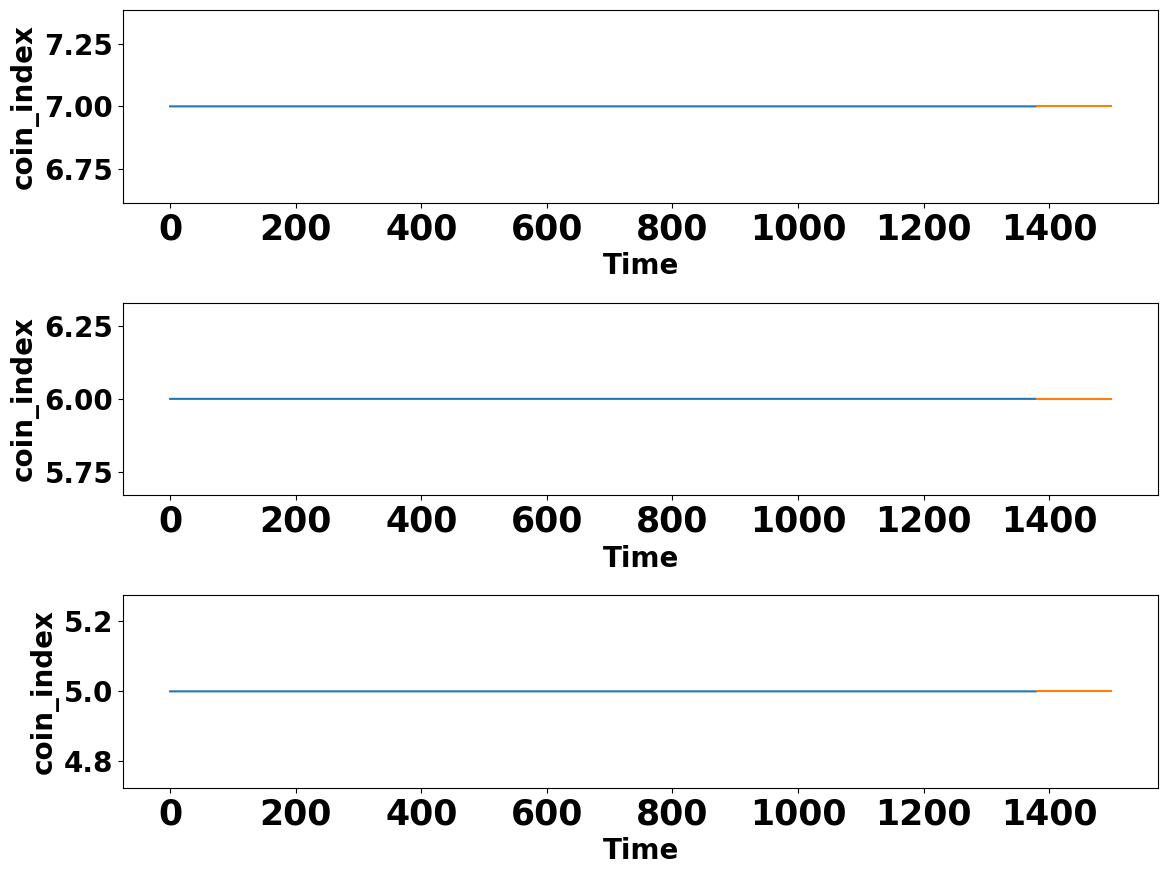

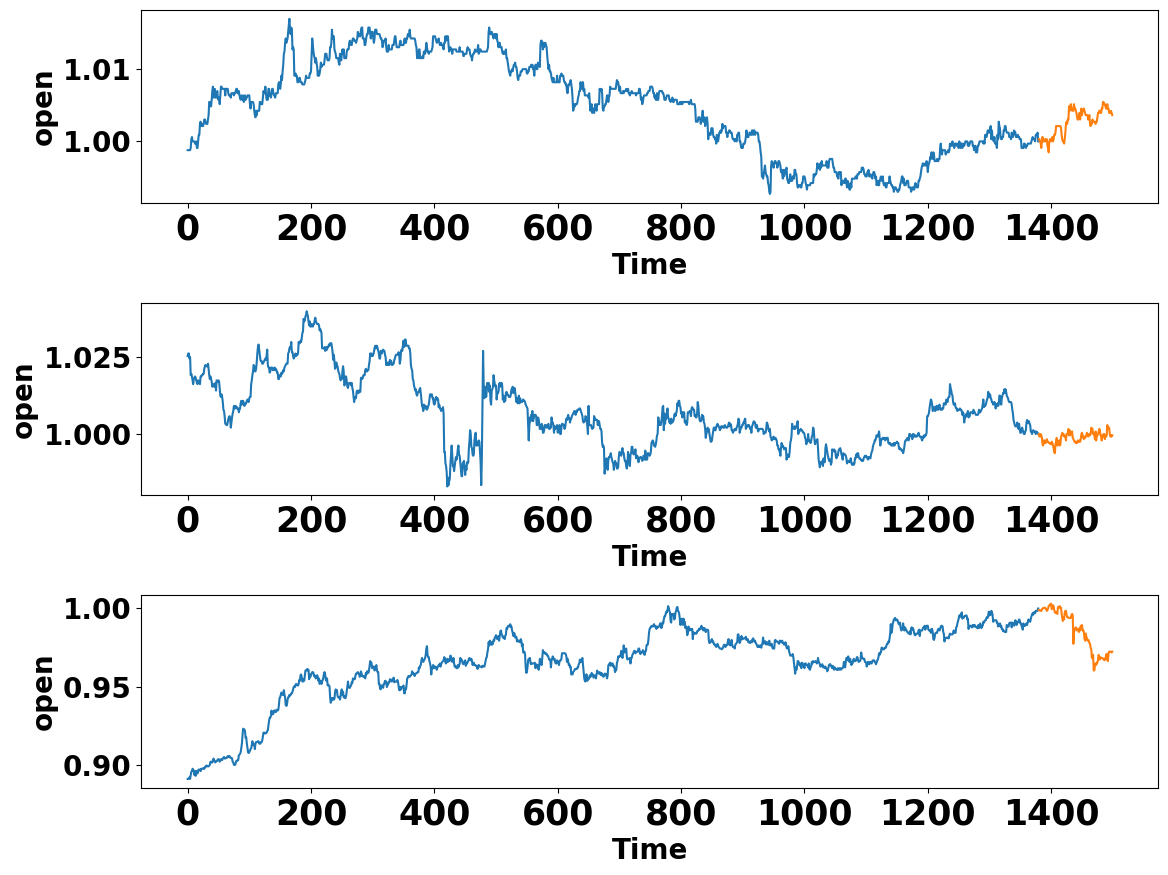

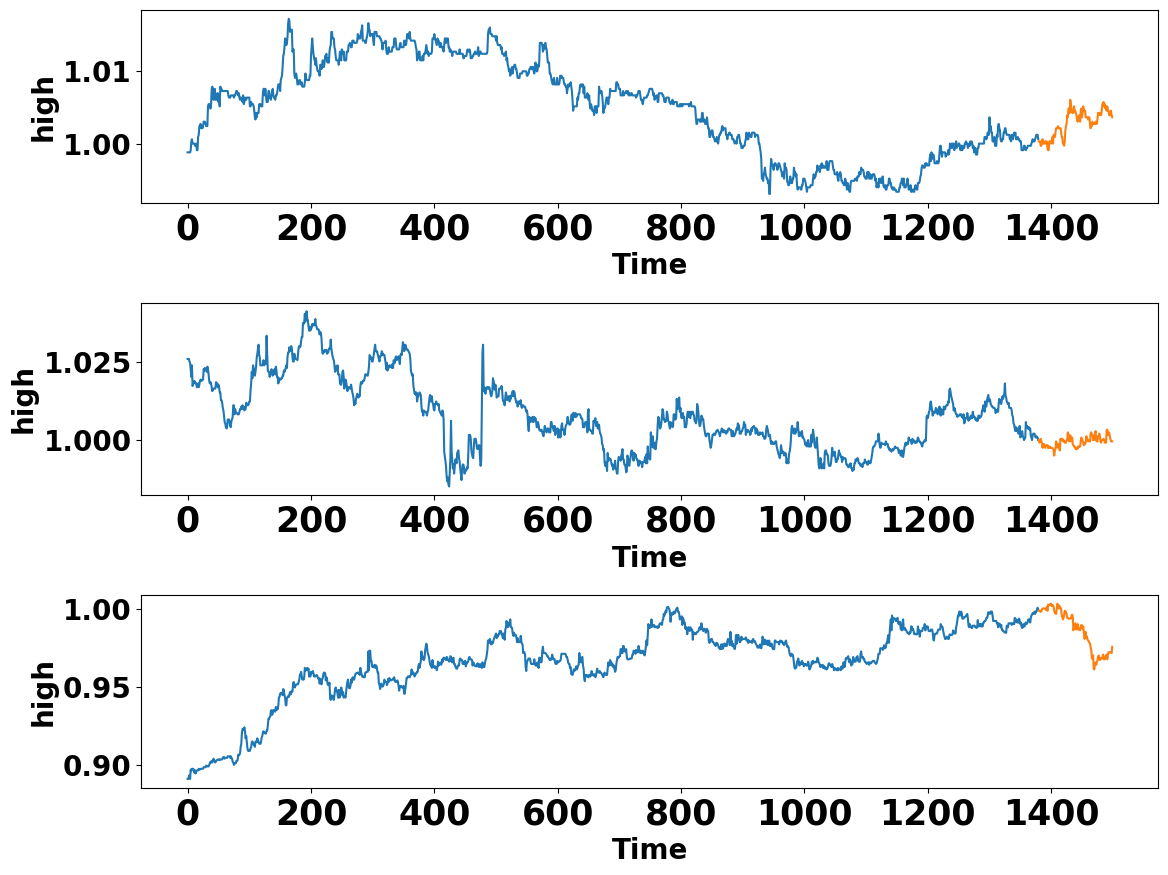

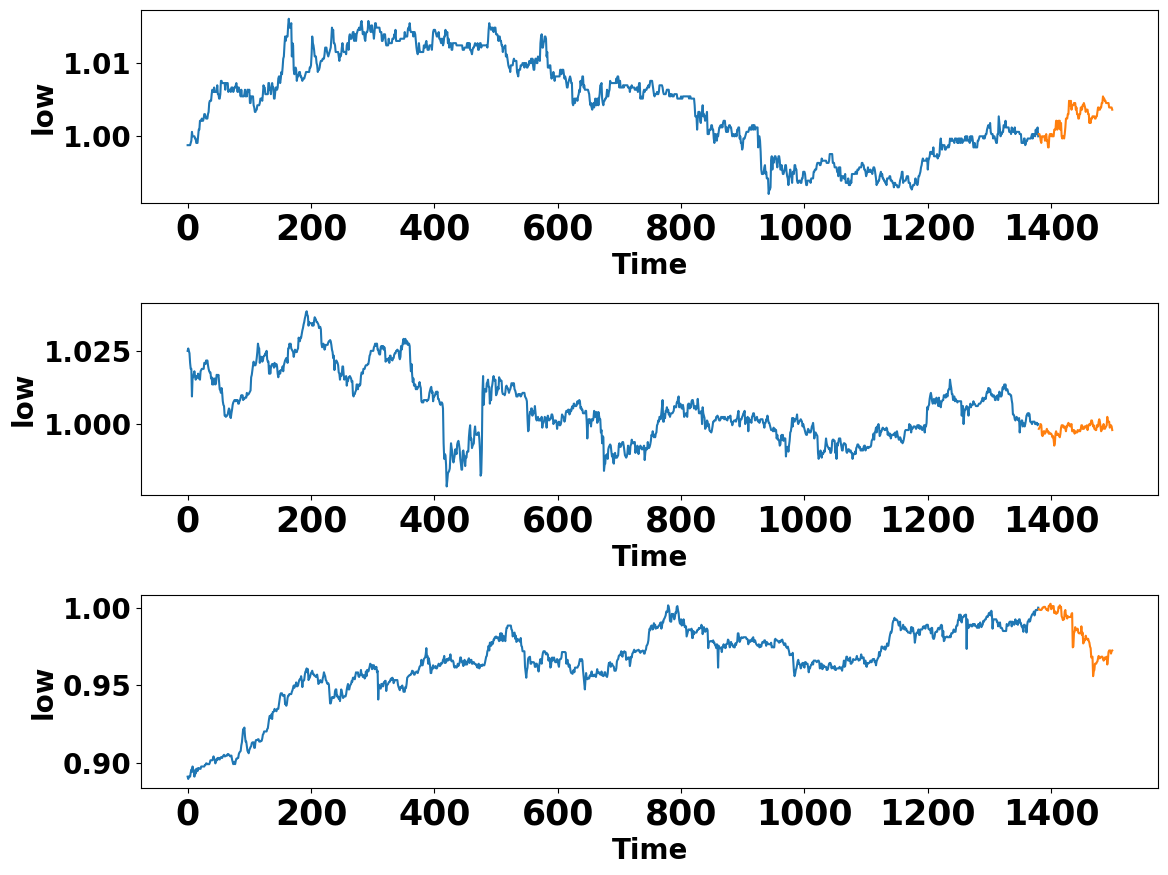

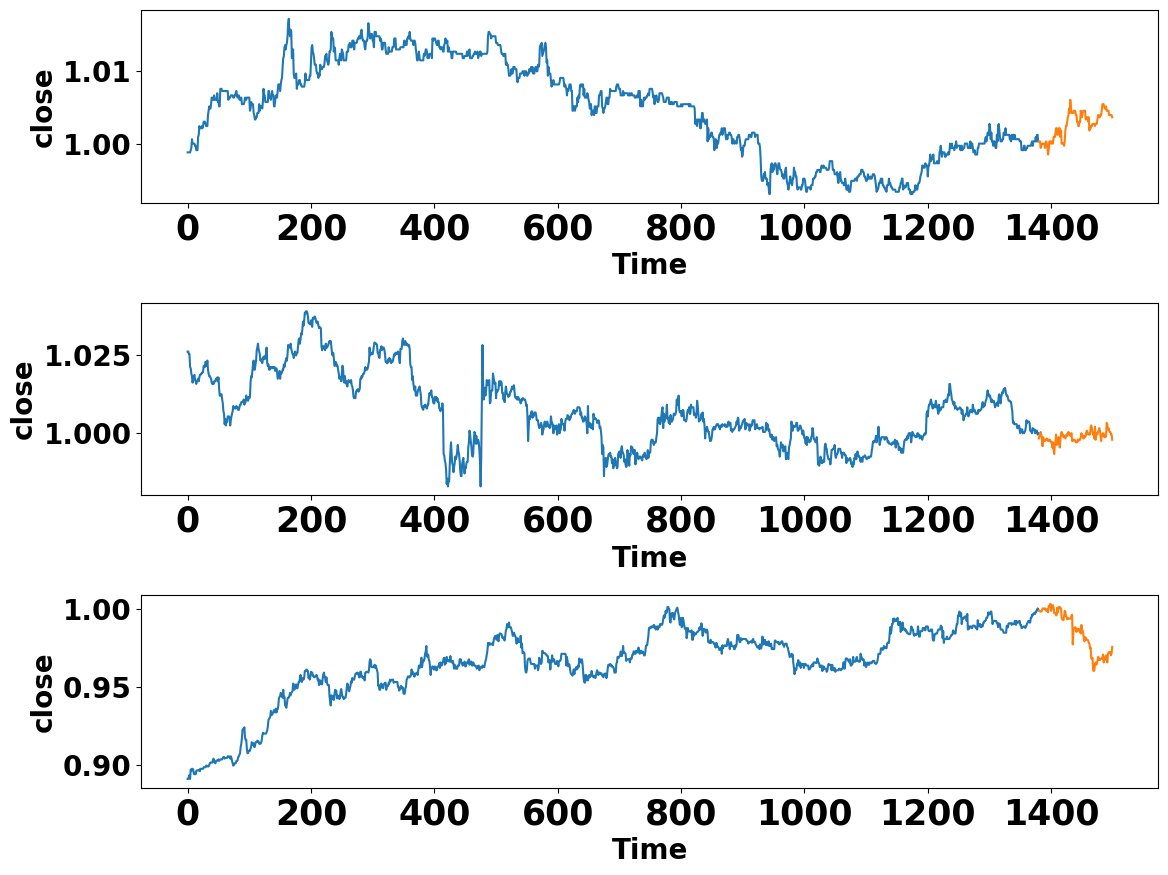

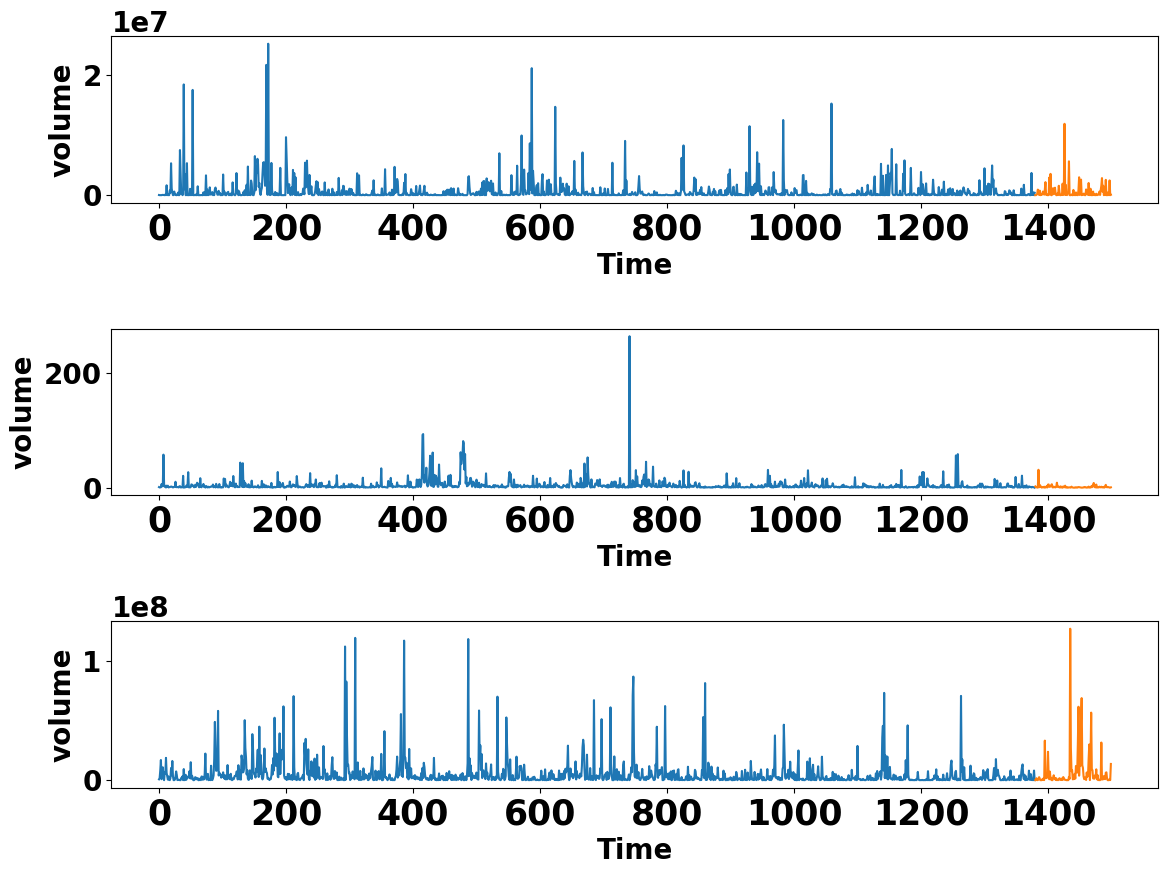

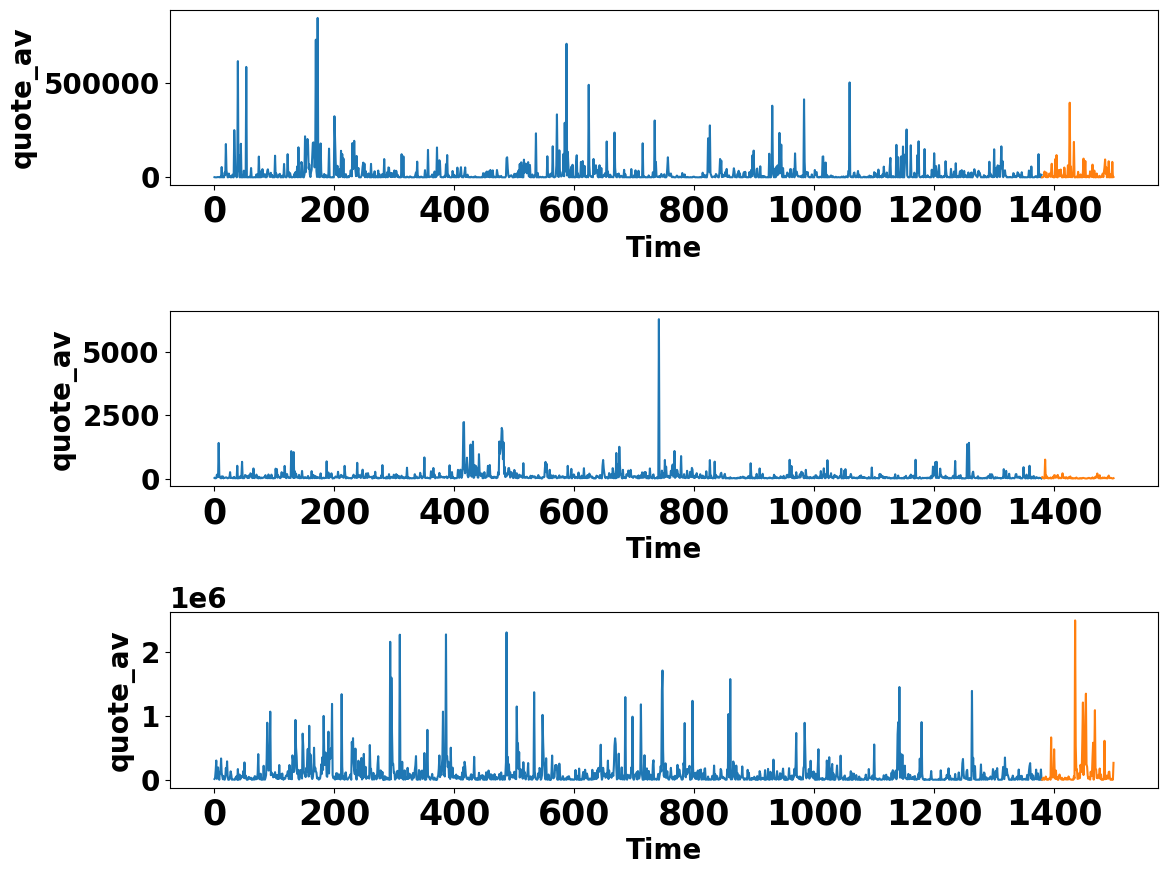

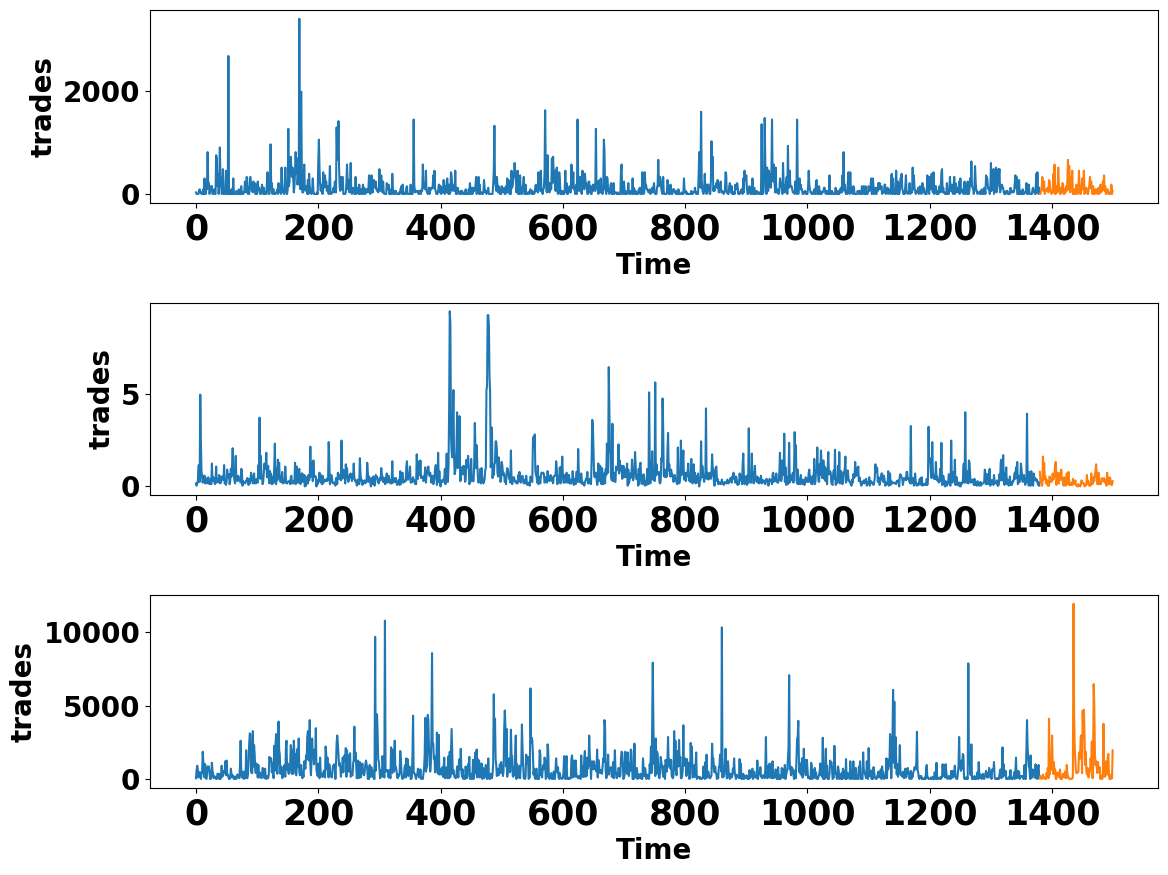

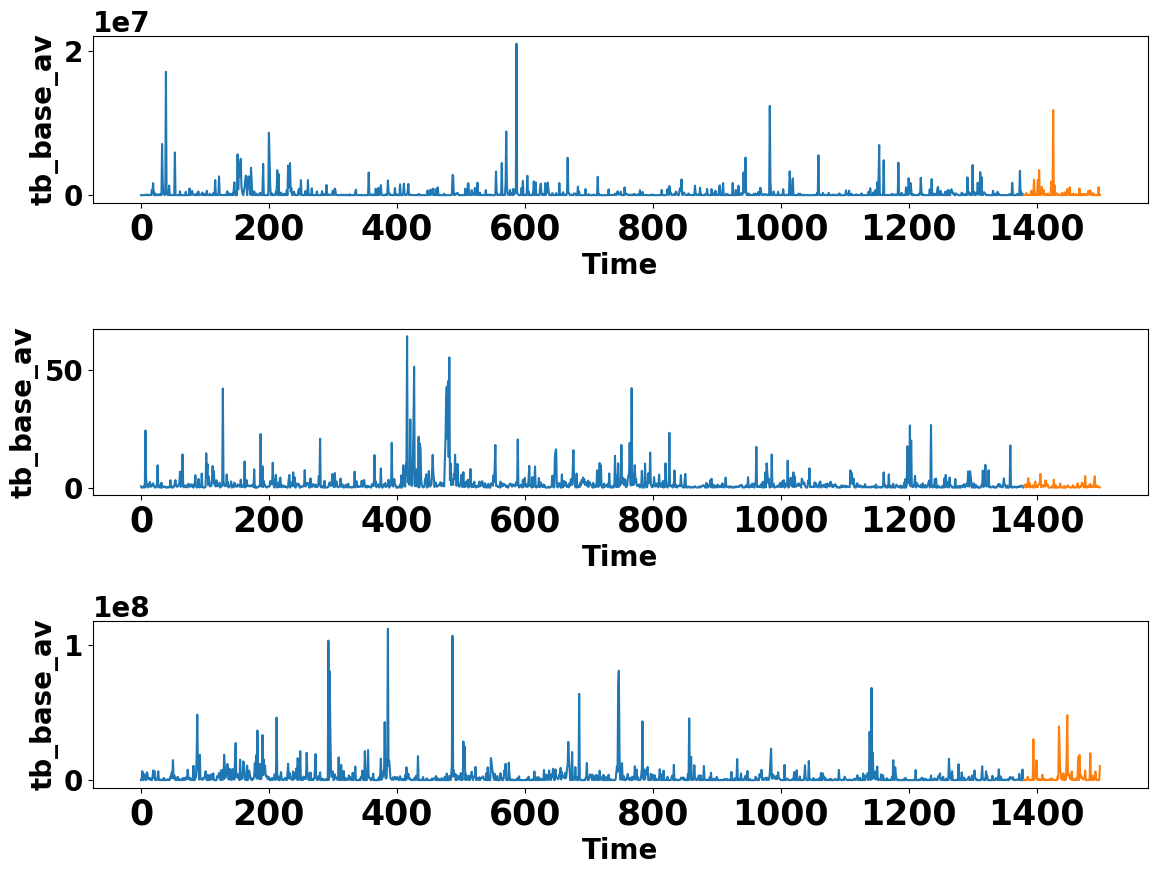

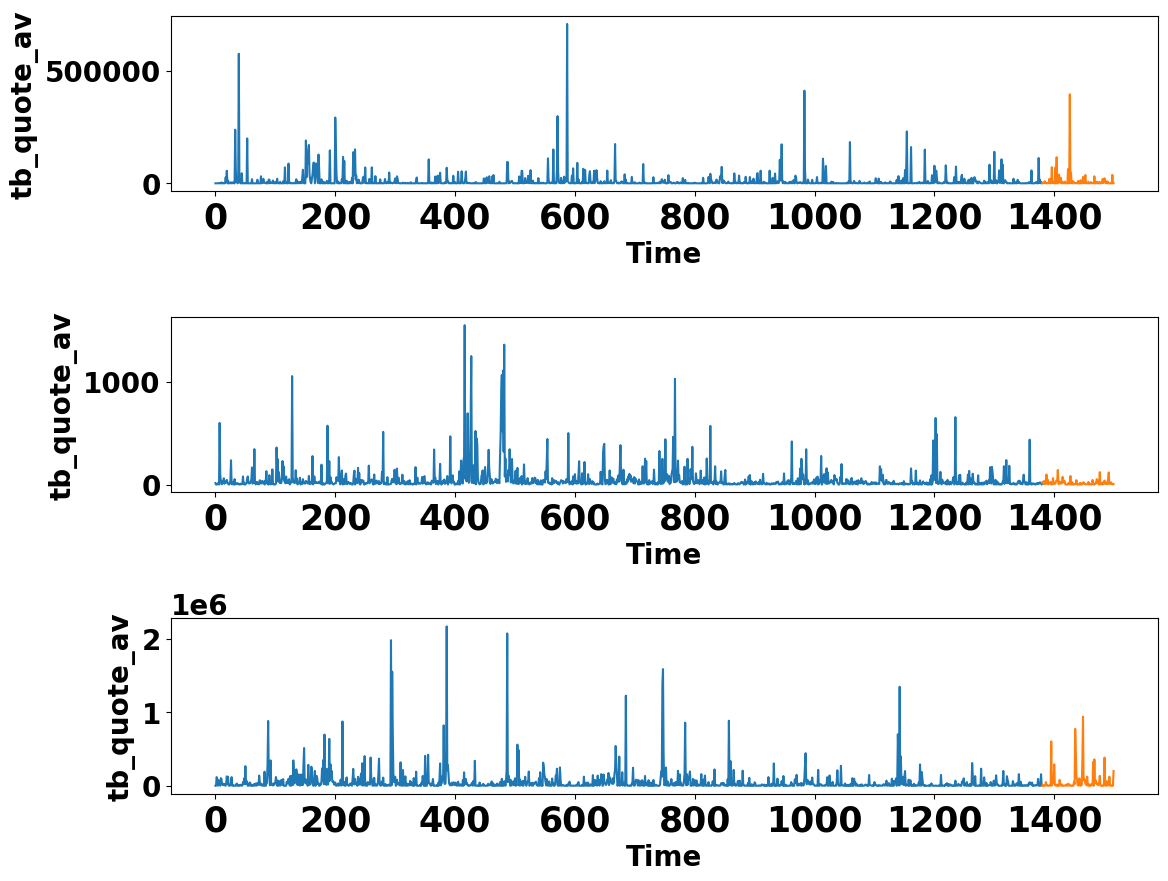

In [9]:
#%% Load dataset
X_train = pd.read_csv('train_x_df.csv')
y_train = pd.read_csv('train_y_df.csv')
X_test = pd.read_csv('test_x_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# ========================================================================
# Basic EDA
# ========================================================================
#%% Plot - Simple 1d plot of randomly selected three data samples
three_sample_id = np.random.randint(X_train.sample_id.min(),
                                    X_train.sample_id.max(),
                                    size=3,
                                    )
view_columns = X_train.columns.drop(['sample_id', 'time'])

for col in view_columns:
    fig_data_1d_plot, ax_data_1d_plot = plt.subplots(3, 1, figsize=(12, 9))

    for idx, sample_id in enumerate(three_sample_id):
        ax_data_1d_plot[idx].plot(np.arange(1380),
                 X_train[X_train.sample_id==sample_id].loc[:, col])
        ax_data_1d_plot[idx].plot(np.arange(1380, 1380+120),
                 y_train[y_train.sample_id==sample_id].loc[:, col])
        ax_data_1d_plot[idx].set_xlabel('Time')
        ax_data_1d_plot[idx].set_ylabel(col)

    plt.tight_layout()
    #os.chdir(dir_nm_save_fig_eda)
    #fig_data_1d_plot.savefig('Train_sample_1d_plot_{}'.format(col))
    #plt.close(fig_data_1d_plot)
    #os.chdir('../')

### 샘플링을 통해 간단한 1차원 그래프 확인하기
train set에서 3개의 sample을 임의로 추출해 시간에 따라 그려보았습니다.


세 샘플 모두 train_x의 open 마지막 지점 값이 1로 맞춰져있는 것을 확인할 수 있습니다.

EDA 과정에선 아직 모델을 확정하지 않았고 LSTM등의 모델을 사용하면 open외에 다른 feature도 사용해야하므로 <br>개략적인 그래프를 그렸으나 ARIMA를 사용하면서 open외에는 사용하지 않았습니다.<br>
다만, sample_id가 train_x, train_y가 일치하는지 여부를 통해 불러온 파일에 문제가 없는지 확인하는 역할을 했습니다.

C:\Users\KimDaegun\Anaconda3\envs\dacon_bit_trader\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='open', ylabel='Density'>

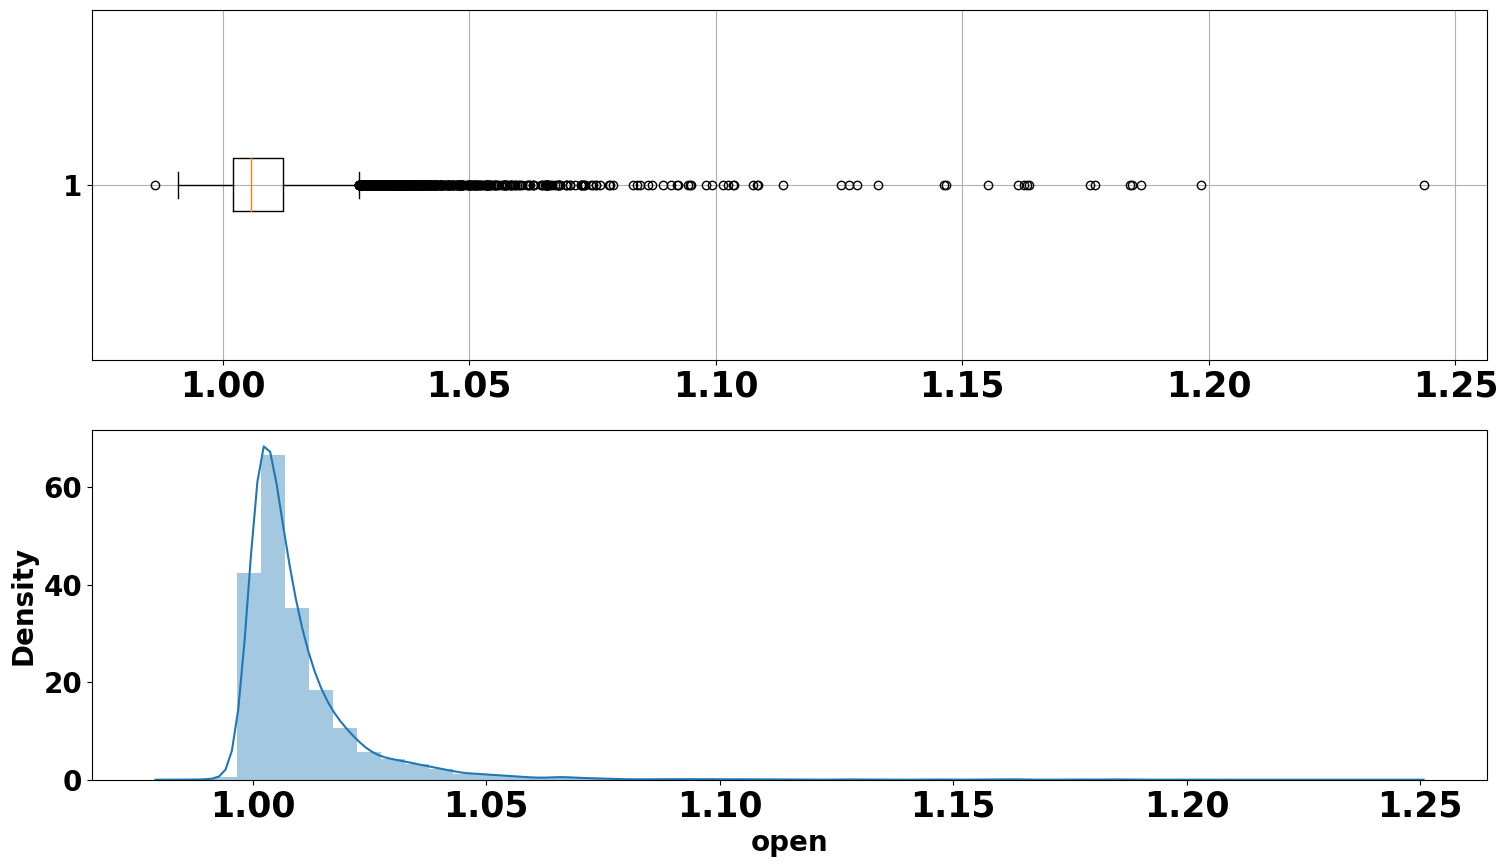

In [10]:
#%% Plot - Distribution of the maximum rate of increase in y-sample
max_increase_y_train = y_train.groupby(by=['sample_id']).max().open

fig_max_increase, ax_max_increase = plt.subplots(2, 1, figsize=(18, 10))
ax_max_increase[0].boxplot(max_increase_y_train, vert=False)
ax_max_increase[0].grid(True)

sns.distplot(max_increase_y_train, ax=ax_max_increase[1])

### y_train을 통해 최대 상승 정도 범위 파악

x_train의 open 마지막 값이 모두 1로 동일한 것을 확인하였으므로 y_train의 모든 샘플의 최대값을 모아 boxplot, distplot을 사용해 분포를 확인했습니다.

- 중앙값이 1이 넘고 전반적으로 오른쪽으로 치우쳐져있는 것을 확인할 수 있었습니다.


- 1.03을 넘는 (즉 3퍼센트 이상 open 값이 상승하는 sample은 흔한 사례는 아님을 확인할 수 있었습니다.


- 크게 상승할 sample을 고르는 것은 상당히 어렵다는 것을 확인하였고 train investment 결과에서 profit_threshold를 결정하는 것에 경험적인 도움이 되었습니다.

In [11]:
#%% Rearrange a subset of the train set
df_X_train_open = pd.DataFrame(dtype='float32')
df_y_train_open = pd.DataFrame(dtype='float32')
s_X_train_open = pd.Series(dtype='object')

X_train_subset = X_train.open

for _id in tqdm(range(X_train.sample_id.max()+1)): 
    df_X_train_open[_id] = \
        X_train_subset.iloc[1380*_id:1380*(_id+1)].values 
    df_y_train_open[_id] = \
        y_train.open.iloc[120*_id:120*(_id+1)].values
    s_X_train_open.at[_id] = \
        X_train_subset.iloc[1380*_id:1380*(_id+1)].values

100%|██████████| 7661/7661 [00:10<00:00, 728.30it/s]


데이터에서 open 값만을 사용하기 위해 다른 feature를 제외하고 dataframe으로 다시 구성했습니다.


s_X_train_open의 경우 multiprocessing을 위해 각 샘플의 open value sequence를 하나의 오브젝트로 하여 pandas series로 구성하였습니다.

In [12]:
#%% Augmented Dickey-Fuller test   
df_X_train_open_diff1 = df_X_train_open.diff(axis=0).iloc[1:, :]
df_X_train_open_diff2 = df_X_train_open_diff1.diff(axis=0).iloc[1:, :]

adf_pval_X_train = pd.DataFrame(index=df_X_train_open.columns,
                                columns=['org', 'diff1', 'diff2'],
                                dtype='float')

splitted_X_train_open = []
for i, d in df_X_train_open.T.iterrows():
    splitted_X_train_open.append(d)

splitted_X_train_open_diff1 = []
for i, d in df_X_train_open_diff1.T.iterrows():
    splitted_X_train_open_diff1.append(d)

splitted_X_train_open_diff2 = []
for i, d in df_X_train_open_diff2.T.iterrows():
    splitted_X_train_open_diff2.append(d)

rslts_adf_pval_X_train = parmap.starmap(cust_f.multi_adfuller_pval, 
                                        zip(splitted_X_train_open),
                                        pm_processes=cpu_use)

rslts_adf_pval_X_train_diff1 = parmap.starmap(cust_f.multi_adfuller_pval, 
                                              zip(splitted_X_train_open_diff1),
                                              pm_processes=cpu_use)

rslts_adf_pval_X_train_diff2 = parmap.starmap(cust_f.multi_adfuller_pval, 
                                              zip(splitted_X_train_open_diff2),
                                              pm_processes=cpu_use)

for idx, data in enumerate(rslts_adf_pval_X_train):
    adf_pval_X_train.at[idx, 'org'] = data

for idx, data in enumerate(rslts_adf_pval_X_train_diff1):
    adf_pval_X_train.at[idx, 'diff1'] = data

for idx, data in enumerate(rslts_adf_pval_X_train_diff2):
    adf_pval_X_train.at[idx, 'diff2'] = data 

In [13]:
adf_pval_X_train.sort_values(by='org', ascending=False)

,org,diff1,diff2
4948,1.000000e+00,2.984901e-19,4.940795e-25
1675,1.000000e+00,1.366928e-19,3.048670e-26
4426,1.000000e+00,8.309511e-22,1.379611e-28
4827,9.990817e-01,9.954058e-01,6.158562e-30
3244,9.990781e-01,6.106357e-09,1.265393e-27
...,...,...,...
5786,6.417526e-08,0.000000e+00,3.915046e-24
720,1.161799e-08,3.857780e-29,8.029742e-27
2071,2.500932e-09,3.482075e-11,4.340041e-23
6044,2.299846e-09,2.081997e-18,3.975793e-27


In [14]:
adf_pval_X_train.sort_values(by='diff1', ascending=False)

,org,diff1,diff2
4827,0.999082,0.995406,6.158562e-30
1953,0.998811,0.103174,2.100233e-22
3839,0.708312,0.001208,1.410128e-27
5575,0.791048,0.000285,6.986137e-25
7511,0.985292,0.000044,2.409158e-28
...,...,...,...
3473,0.337903,0.000000,3.631822e-25
3472,0.748450,0.000000,8.936765e-25
3471,0.097597,0.000000,1.101770e-24
3470,0.280573,0.000000,3.187816e-27


In [15]:
adf_pval_X_train.sort_values(by='diff2', ascending=False)

,org,diff1,diff2
6801,0.993544,1.504686e-15,4.926461e-13
3557,0.843488,4.823706e-10,1.867469e-17
1367,0.000009,8.336753e-13,2.081294e-18
3788,0.901506,4.034803e-14,6.869714e-19
3857,0.702209,4.667608e-14,9.556677e-20
...,...,...,...
5810,0.933584,7.467391e-16,2.059692e-30
5133,0.565389,7.357619e-30,2.052462e-30
6923,0.435589,1.321229e-15,2.026472e-30
1558,0.880878,1.415045e-11,0.000000e+00


In [16]:
print('# of sample_id in X train which has p-value bigger than 0.5\nOriginal {}\nFirst order differencing {}\nSecond order differencing {}'\
     .format(len(adf_pval_X_train[adf_pval_X_train.org>0.05]), 
             len(adf_pval_X_train[adf_pval_X_train.diff1>0.05]), 
             len(adf_pval_X_train[adf_pval_X_train.diff2>0.05])))

# of sample_id in X train which has p-value bigger than 0.5
Original 6808
First order differencing 2
Second order differencing 0


### ARIMA parameter 중 d(차분) grid search 구간 설정을 위한 ADF-test

다들 잘 알고계시겠지만 ARIMA는 stationary한 데이터를 다룬다고 가정하는 ARMA 모델의 조건을 만족시키기 위해 <br>데이터 차분을 위한 parameter p를 가지고 있습니다.


다수의 병렬형 모델을 구축하였기 때문에 multiprocessing을 사용해도 parameter search grid를 키우는 것은 <br>상당히 부담스러운 일이었고 적절하게 __d의 범위를 제한하고 싶었습니다.__


위쪽의 세 데이터 테이블과 바로 위 code cell의 실행결과를 볼 때 __한 번의 차분으로 거의 모든 sample의 stationarity가 확보__되고 <br>__두 번째 차분에선 모든 sample이 ADF test를 통과__했음을 알 수 있었습니다. <br>또한, __차분이 없는 경우 (d=0) 7661개 중 대부분인 6808개의 sample이 non stationary함__을 알 수 있었습니다.


__따라서 d의 parameter search 범위를 0~2로 제한__했습니다. <br>
d=2까지 필요하지 않을 수 있으나 train과 test set이 약간 상이할 수 있으므로 약간 보수적으로 생각해 0~2의 범위로 설정했습니다.

## 
## Train set 훈련을 통한 최적의 투자방법 찾기

100%|██████████| 20/20 [00:08<00:00,  2.28it/s]


Text(0.5, 0.98, 'ARIMA by AIC, (p, d, q)=(1, 0, 0)')

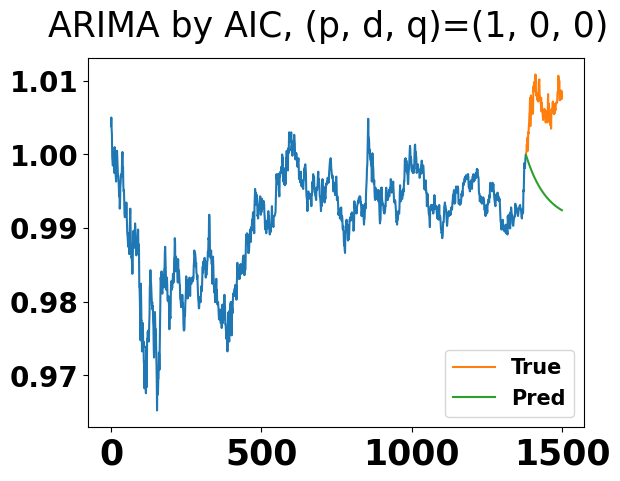

In [17]:
# ========================================================================
# Prediction model 1: Statistical Timeseries model prediction
# ========================================================================

#%% Choose a data sample for models prediction test        
sample_seed = np.random.randint(0, 7000)
sample_X = X_train[X_train.sample_id==sample_seed].loc[:, ['time', 'open']]
sample_y = y_train[y_train.sample_id==sample_seed].loc[:, ['time', 'open']]
sample_y.time += sample_X.time.max() + 1

#% ARIMA model from statsmodels     
p = [1, 2, 4, 6, 8]
d = q = range(0, 2)
params_arima = list(it.product(p, d, q))

combs_aic = {}
aics = []

for i, param in enumerate(tqdm(params_arima)):
    try:
        mdl = ARIMA(sample_X.open.values, 
                    order=param, 
                    enforce_invertibility=False,
                    enforce_stationarity=False)
        mdl_fit = mdl.fit()
        combs_aic.update({mdl_fit.aic : param})
        aics.append(mdl_fit.aic)

    except: continue

mdl_arima_best_aic = min(aics)

mdl_stat_arima_aic = ARIMA(sample_X.open.values,
                           order=combs_aic[mdl_arima_best_aic],
                           enforce_invertibility=False,
                           enforce_stationarity=False)
mdl_stat_arima_aic_fit = mdl_stat_arima_aic.fit()

plt.figure()
plt.plot(sample_X.time, sample_X.open)
plt.plot(sample_y.time, sample_y.open, label='True')
plt.plot(sample_y.time, 
         mdl_stat_arima_aic_fit.forecast(len(sample_y)), 
         label='Pred')
plt.legend()
plt.suptitle('ARIMA by AIC, (p, d, q)={}'.format(
    combs_aic[mdl_arima_best_aic]))

### ARIMA 모델이 잘 작동하는지 확인하기


train set에서 한 샘플을 추출해 AIC를 기반으로 한 ARIMA 모델이 훈련과 예측이 잘 진행되는지 점검하였습니다.


중요 파라미터인 __p, d, q 중 d는 이전의 ADF test를 기반으로 하고, p와 q는 경험적으로 범위를 설정__하였습니다.


해당 샘플의 예측 결과는 크게 빗나갔으나 7661개의 train sample에 각 하나씩 ARIMA를 할당할 예정이기 때문에 <br>
하나의 예측 성능은 크게 신경쓰지 않았고, AIC를 기준으로 자동으로 무리없이 동작하는 것을 확인했습니다.

In [18]:
#%% Predict the whole train set with ARIMA model by AIC
if run_whole_train_fcst_by_arima:
    rslt_arima_pred_train = pd.DataFrame(dtype='float32')

    t_s = time.time()

    pool = multiprocessing.Pool(processes=cpu_use)
    print('\nPredict train set by ARIMA \n')

    rslt_arima_pred_train = pool.starmap(cust_f.arima_prediction, 
                                         zip(s_X_train_open),
                                         )

    pool.close(); pool.join()
    print('Predict train set with ARIMA took : ', time.time()-t_s, 
          'seconds\n')

    with open ('rslt_train_pred_by_arima', 'wb') as f:
        pickle.dump(rslt_arima_pred_train, f)
else: 
    print('''Previously predicted result of train set with ARIMA is '''
          '''loaded''') 
    with open ('rslt_train_pred_by_arima', 'rb') as f:
        rslt_arima_pred_train = pickle.load(f)

df_y_train_arima = pd.DataFrame(dtype='float32')
for _id, single_pred in enumerate(rslt_arima_pred_train):
    df_y_train_arima[_id] = single_pred    

Previously predicted result of train set with ARIMA is loaded


### Train_y의 예측결과 얻기

Train set의 개별 sample에 ARIMA를 각각 적용해 120 time step의 예측 결과를 얻었습니다.<br>
이 결과를 이용해 다양한 방식으로 train set에 모의 투자를 진행한 뒤 최적의 투자방법을 찾고자 했습니다.


In [19]:
#%% Gridsearch best investment by train set prediction with ARIMA by AIC
invest_time_limit_grid = [60, 80, 100, 120] #np.arange(10, 130, step=10)
invest_buy_qty_grid = [1]
invest_profit_thld = [1, 1.01]
invest_strats = it.product(invest_buy_qty_grid,
                          invest_time_limit_grid,
                          invest_profit_thld)

df_train_invest_arima_aic = pd.DataFrame(index=['buy_qty', 'sell_time', 
                                                'profit_thld', 'money',
                                                'num_invest'])

splited_invest_strats_arima_aic = list(zip(it.repeat(df_y_train_open),
                                     it.repeat(df_y_train_arima),
                                     invest_strats))

rslts_train_invest_arima_aic = \
    parmap.starmap(cust_f.train_invest, 
                   splited_invest_strats_arima_aic, 
                   pm_pbar=True,
                   pm_processes=cpu_use)

for _idx, inv_r in enumerate(rslts_train_invest_arima_aic):
    df_train_invest_arima_aic[_idx] = inv_r

df_train_invest_arima_aic = df_train_invest_arima_aic.T

100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


### Train set에 모의 투자 진행 후 최적의 투자방법 찾기

이전에 얻은 df_y_train_arima의 경우 단순히 7661개의 sample의 미래 120 time step을 예측한 결과입니다.<br>
이 정보를 이용하여 submission 해야하는 두 전략 __buy_quantity__와 __sell_time__, <br>그리고 자체적으로
고려한 profit_thld (ARIMA를 통해 예측한 결과 sequence 최대값에 기반한 각 샘플의 투자 여부)을 전략으로 삼았습니다.


* __buy_quantity 의 경우 1로 고정__하였는데, 시즌 1과 시즌 2 모두 대단히 높은 수치의 public score 들이 많이 있어, <br> 
저도 과감히 투자해 어느정도 따라가 보고자하는 마음에 안전한 투자보단 높은 투자비율을 선정했습니다. 


* __profit_thld 의 경우 1.01을 넘길 경우 지나치게 적은 비율의 sample에 투자하게 되는 경향__이 있었습니다.<br>
(몇 개의 샘플을 모니터링 해본 결과 ARIMA 예측 결과들이 급격한 상승 또는 하강을 보이지 않는 경향이 있었습니다.)


* __sell_time 은 기본적으로 ARIMA 예측 결과가 최대치가 되는 타이밍을 각 sample 의 매도 타이밍__으로 하였지만, <br>
하나 더하여 __매도 타이밍의 상한을 어느 시점으로 하면 좋을지 탐색__해보았습니다. <br>
이는 __시계열 예측에서 보다 먼 미래의 예측값이 가까운 미래보다 부정확할 가능성이 크기 때문입니다__.<br>
 
 더하여, time_limit_grid가 60 부터 시작하는 이유는 ARIMA가 실제로 추세를 잘 예측하더라도 지나치게 짧은 시간 후 매도할 경우<br> 상승 추세에 따른 변화가 충분히 진행되지 않아 큰 수익을 내기 어려울 것이라고 생각해 어느정도 보유시간을 두기위한 고려였습니다.

## 
## Test x 를 이용해 훈련한 뒤 prediction 결과 얻기

In [20]:
#%% Rearrange a subset of the test set
df_X_test_open = pd.DataFrame(dtype='float32')
s_X_test_open = pd.Series(dtype='object')

X_test_subset = X_test.open

for _id in tqdm(range((X_test.sample_id.max()-X_test.sample_id.min())+1)): 
    df_X_test_open[_id] = \
        X_test_subset.iloc[1380*_id:1380*(_id+1)].values 
    s_X_test_open.at[_id] = \
        X_test_subset.iloc[1380*_id:1380*(_id+1)].values 

100%|██████████| 535/535 [00:00<00:00, 1327.55it/s]


In [21]:
#%% Predict the whole test set with ARIMA by AIC
if run_whole_test_fcst_by_arima:
   rslt_arima_pred_test_aics = pd.DataFrame(dtype='float32')

   t_s = time.time()

   pool = multiprocessing.Pool(processes=cpu_use)
   print('\nPredict Test set with ARIMA \n')

   rslt_arima_pred_test_aics = pool.starmap(cust_f.arima_prediction, 
                                            zip(s_X_test_open),
                                            )

   pool.close(); pool.join()
   print('Predict Test set with ARIMA took : ',time.time()-t_s,'seconds\n')

   with open ('rslt_test_pred_by_arima', 'wb') as f:
       pickle.dump(rslt_arima_pred_test_aics, f)
else: 
    print('Previously predicted result of test set with ARIMA is loaded') 
    with open ('rslt_test_pred_by_arima', 'rb') as f:
        rslt_arima_pred_test_aics = pickle.load(f)

df_y_test_arima_aics = pd.DataFrame(dtype='float32')
for _id, single_pred in enumerate(rslt_arima_pred_test_aics):
    df_y_test_arima_aics[_id+X_test.sample_id.min()] = single_pred    

Previously predicted result of test set with ARIMA is loaded


## Test set prediction 결과 얻기

이로서 __Train set 모의 투자에 따른 최적 투자 전략 + ARIMA 를 이용한 test set prediction 결과__를 조합하여 submission을 얻을 수 있게 되었습니다.

근본적으로 __train set 에서 한 투자가 방식이 test set 에서도 최적의 투자방법일 것 이라는 가정__하에 진행되고 있습니다.<br>
물론 아닐 가능성이 있지만 머신러닝 예측이란 train set 의 분포를 기반으로 하기 때문에 달리 신뢰할만한 정보가 없다고 판단했습니다.

In [22]:
#%% Make and Save submission based on ARIMA's best investment strategy
if run_new_arima_submission:
    submission_arima_aics = make_submission(
        df_y_test_arima_aics, 
        df_train_invest_arima_aic.at[
            df_train_invest_arima_aic.money.idxmax(), 'buy_qty'],
        int(df_train_invest_arima_aic.at[
            df_train_invest_arima_aic.money.idxmax(), 'sell_time']),
        profit_thld=df_train_invest_arima_aic.at[
            df_train_invest_arima_aic.money.idxmax(), 'profit_thld']
        )

    submission_arima_aics.to_csv(
        'submission_arima_time_{}_{}_{}_{}_{}.csv'\
                            .format(datetime.now().year,
                                    datetime.now().month,
                                    datetime.now().day,
                                    datetime.now().hour,
                                    datetime.now().minute),
                            index=False)
    
submission_arima_aics

,sample_id,buy_quantity,sell_time
0,7661,0.0,0
1,7662,0.0,0
2,7663,1.0,100
3,7664,1.0,100
4,7665,1.0,100
...,...,...,...
530,8191,0.0,100
531,8192,0.0,100
532,8193,1.0,100
533,8194,0.0,100


### Submission 파일 만들기


앞서 언급했던 두 정보를 기반으로 submission 파일을 생성했습니다.<br>
train set 투자를 기반으로 sell_time 의 상한이 100으로 설정된 것을 확인할 수 있는데, 상당히 후반부에 매도 타이밍이 잡혔습니다.<br>
아마도 ARIMA 가 추세를 잘 예측했다고 할 때 보유기간을 늘려 실제 open 값이 추세에 따라 성장할 시간을 충분히 주는 것이 좋았던 것 같습니다.

In [23]:
#%% Calculate total running time
print('Total runtime : {} secs'.format(time.time()-tot_run_time_start))    

Total runtime : 256.49981665611267 secs


## 
## Windows 기반 anaconda spyder 코드

서두에서 말씀드렸던 multiprocessing 구현 이슈로 인해 jupyter notebook과 spyder 코드가 다른 부분이 있습니다.<br>
뚜렷한 차이점은 역시 ```if __name__ == '__main__':```으로 multiprocessing 에서 사용할 함수와 main script가 분리되어있는 점 입니다.

In [24]:
"""
#%% Import modules
import itertools as it
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller

#%% Custom functions
def multi_adfuller_pval(seq):
    return adfuller(seq)[1]


def train_invest(y_train_open, y_train_mdl, invest_strat, use_weight=False):
    if use_weight:
        buy_q, sell_t, p_thld, weight = invest_strat
    else:
        buy_q, sell_t, p_thld = invest_strat
        weight=None
    
    if len(y_train_mdl) > 1 and weight != None:
        if weight < 0 or weight > 1: 
            print('Weight must from 0 to 1')
            raise ValueError
        elif len(y_train_mdl) > 2:
            print('More than two prediction results are exist')
            raise ValueError
        
        y_train_mdl = weight*y_train_mdl[0] + (1-weight)*y_train_mdl[-1]
        # Change y_train_mdl as a weighted sum of y_train_mdl elements
    
        rslt_invest = calc_train_investment(
            y_train_open, make_submission(y_train_mdl,
                                          buy_q,
                                          sell_t,
                                          profit_thld=p_thld))
        return [buy_q, sell_t, p_thld, weight, rslt_invest[0], rslt_invest[1]]

    rslt_invest = calc_train_investment(
        y_train_open, make_submission(y_train_mdl,
                                      buy_q,
                                      sell_t,
                                      profit_thld=p_thld))
    
    return [buy_q, sell_t, p_thld, rslt_invest[0], rslt_invest[1]]


def make_submission(df_y_pred, buy_qty, time_limit, profit_thld=1.01):
    assert (buy_qty > 0) & (buy_qty <= 1) 
    
    rslt_subm = pd.DataFrame(index=np.arange(len(df_y_pred.columns)))
    df_y_pred_subset = df_y_pred.iloc[:time_limit+1, :]

    rslt_subm['sample_id'] = df_y_pred.columns
    rslt_subm = rslt_subm.set_index('sample_id')

    rslt_subm['buy_quantity'] = 0
    rslt_subm.loc[df_y_pred.max()>profit_thld, 'buy_quantity'] = buy_qty
    
    rslt_subm['sell_time'] = df_y_pred_subset.idxmax().values
    
    rslt_subm = rslt_subm.reset_index()
    
    return rslt_subm


def calc_train_investment(df_y_open_true, subm):
    money = 10000
    for _idx, _val in subm.iterrows():
        money = money*_val.buy_quantity*\
            df_y_open_true.loc[_val.sell_time, _val.sample_id]*(0.9995)**2 + \
            money*(1-_val.buy_quantity)
    num_invest = len(subm[subm.buy_quantity!=0])
    
    return money, num_invest


def arima_prediction(df_open):
    import warnings
    
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tools.sm_exceptions import ConvergenceWarning
    
    warnings.simplefilter('ignore', ConvergenceWarning) 
    # Ignore convergence warning
    
    p = [1, 2, 4, 6, 8]
    d = q = range(0, 2)
    params_arima = list(it.product(p,d,q))
    
    combs = {}
    aics = []
    
    for i, param in enumerate(params_arima):
        try:
            m = ARIMA(df_open, 
                      order=param,
                      # enforce_invertibility=False,
                      # enforce_stationarity=False
                      )
            m_fit = m.fit()
            combs.update({m_fit.aic : param})
            aics.append(m_fit.aic)
            
        except: continue
        
    m_arima_best_aic_idx = min(aics)        
    m_arima = ARIMA(df_open,
                    order=combs[m_arima_best_aic_idx],
                    enforce_invertibility=False,
                    enforce_stationarity=False)
    m_arima_fit = m_arima.fit()            
    
    return m_arima_fit.forecast(120)

#%% Main script
if __name__ == '__main__':
        
    #% Import modules
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import os
    import seaborn as sns
    import time
    import pickle
    import multiprocessing
    import warnings
    import parmap
    
    from tqdm import tqdm
    from PIL import Image
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tools.sm_exceptions import ConvergenceWarning
    from datetime import datetime
    
    tot_run_time_start = time.time()

    #%% Overall settings
    run_whole_train_fcst_by_arima = False
    print('\nForecasting whole train set with ARIMA model <{}>'.format(
        run_whole_train_fcst_by_arima))
    
    run_whole_test_fcst_by_arima = False
    print('\nForecasting whole test set with ARIMA model <{}>'.format(
        run_whole_test_fcst_by_arima))
      
    run_new_arima_submission = False
    print('\nMake new submission file based on ARIMA <{}>'.format(
        run_new_arima_submission))
    
    #%% Ignore convergence warning
    warnings.simplefilter('ignore', ConvergenceWarning)
    print("\nStatsmodels' ConvergenceWarning is ignored")
    
    #%% Overall settings
    np.random.seed(0) # Fix random seed for making results reproducible
    
    #%% Make dir for saving figures
    dir_nm_save_fig_eda = 'Fig_dacon_bit_trader_EDA'
    try:
        os.mkdir(dir_nm_save_fig_eda)
    except FileExistsError:
        pass
    
    dir_nm_save_fig_pred = 'Fig_dacon_bit_trader_prediction'
    try:
        os.mkdir(dir_nm_save_fig_pred)
    except FileExistsError:
        pass
    
    #%% Plot style
    plt.style.use('default')
    
    # Matplotlib fontsize change
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    LARGE_SIZE = 25
    
    plt.rc('font', size=SMALL_SIZE, weight='bold')
    plt.rc('axes', titlesize=LARGE_SIZE, titleweight='bold')
    plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')
    plt.rc('axes', titleweight='bold')
    plt.rc('xtick', labelsize=LARGE_SIZE)
    plt.rc('ytick', labelsize=MEDIUM_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    plt.rc('figure', titlesize=LARGE_SIZE)
    
    # Save figure settings
    high_dpi = 300
    fig_file_ext = '.png'
    Image.MAX_IMAGE_PIXELS=None # Ignore DecompressionBombError
    
    #%% Set multiprocessing process number
    cpu_use = round(multiprocessing.cpu_count()*3/4)  
    
    #%% Load dataset
    X_train = pd.read_csv('train_x_df.csv')
    y_train = pd.read_csv('train_y_df.csv')
    X_test = pd.read_csv('test_x_df.csv')
    sample_submission = pd.read_csv('sample_submission.csv')
    
    # ========================================================================
    # Basic EDA
    # ========================================================================
    #%% Plot - Simple 1d plot of randomly selected three data samples
    three_sample_id = np.random.randint(X_train.sample_id.min(),
                                        X_train.sample_id.max(),
                                        size=3,
                                        )
    view_columns = X_train.columns.drop(['sample_id', 'time'])
    
    for col in view_columns:
        fig_data_1d_plot, ax_data_1d_plot = plt.subplots(3, 1, figsize=(12, 9))
     
        for idx, sample_id in enumerate(three_sample_id):
            ax_data_1d_plot[idx].plot(np.arange(1380),
                     X_train[X_train.sample_id==sample_id].loc[:, col])
            ax_data_1d_plot[idx].plot(np.arange(1380, 1380+120),
                     y_train[y_train.sample_id==sample_id].loc[:, col])
            ax_data_1d_plot[idx].set_xlabel('Time')
            ax_data_1d_plot[idx].set_ylabel(col)
        
        plt.tight_layout()
        os.chdir(dir_nm_save_fig_eda)
        fig_data_1d_plot.savefig('Train_sample_1d_plot_{}'.format(col))
        plt.close(fig_data_1d_plot)
        os.chdir('../')
        
    #%% Plot - Distribution of the maximum rate of increase in y-sample
    max_increase_y_train = y_train.groupby(by=['sample_id']).max().open
    
    fig_max_increase, ax_max_increase = plt.subplots(2, 1, figsize=(18, 10))
    ax_max_increase[0].boxplot(max_increase_y_train, vert=False)
    ax_max_increase[0].grid(True)
    
    sns.distplot(max_increase_y_train, ax=ax_max_increase[1])
    
    #%% Rearrange a subset of the train set
    df_X_train_open = pd.DataFrame(dtype='float32')
    df_y_train_open = pd.DataFrame(dtype='float32')
    s_X_train_open = pd.Series(dtype='object')
    
    X_train_subset = X_train.open
    
    for _id in tqdm(range(X_train.sample_id.max()+1)): 
        df_X_train_open[_id] = \
            X_train_subset.iloc[1380*_id:1380*(_id+1)].values 
        df_y_train_open[_id] = \
            y_train.open.iloc[120*_id:120*(_id+1)].values
        s_X_train_open.at[_id] = \
            X_train_subset.iloc[1380*_id:1380*(_id+1)].values
    
    #%% Augmented Dickey-Fuller test
    df_X_train_open_diff1 = df_X_train_open.diff(axis=0).iloc[1:, :]
    df_X_train_open_diff2 = df_X_train_open_diff1.diff(axis=0).iloc[1:, :]
    
    adf_pval_X_train = pd.DataFrame(index=df_X_train_open.columns,
                                    columns=['org', 'diff1', 'diff2'],
                                    dtype='float')
    
    splitted_X_train_open = []
    for i, d in df_X_train_open.T.iterrows():
        splitted_X_train_open.append(d)
        
    splitted_X_train_open_diff1 = []
    for i, d in df_X_train_open_diff1.T.iterrows():
        splitted_X_train_open_diff1.append(d)
        
    splitted_X_train_open_diff2 = []
    for i, d in df_X_train_open_diff2.T.iterrows():
        splitted_X_train_open_diff2.append(d)
    
    rslts_adf_pval_X_train = parmap.starmap(multi_adfuller_pval, 
                                            zip(splitted_X_train_open),
                                            pm_processes=cpu_use)
    
    rslts_adf_pval_X_train_diff1 = \
        parmap.starmap(multi_adfuller_pval, zip(splitted_X_train_open_diff1),
                       pm_processes=cpu_use)
    
    rslts_adf_pval_X_train_diff2 = \
        parmap.starmap(multi_adfuller_pval, zip(splitted_X_train_open_diff2),
                       pm_processes=cpu_use)
        
    #%
    for idx, data in enumerate(rslts_adf_pval_X_train):
        adf_pval_X_train.at[idx, 'org'] = data
        
    for idx, data in enumerate(rslts_adf_pval_X_train_diff1):
        adf_pval_X_train.at[idx, 'diff1'] = data

    for idx, data in enumerate(rslts_adf_pval_X_train_diff2):
        adf_pval_X_train.at[idx, 'diff2'] = data 
    
    # ========================================================================
    # Prediction model 1: Statistical Timeseries model prediction
    # ========================================================================
    
    #%% Choose a data sample for models prediction test        
    sample_seed = np.random.randint(0, 7000)
    sample_X = X_train[X_train.sample_id==sample_seed].loc[:, ['time', 'open']]
    sample_y = y_train[y_train.sample_id==sample_seed].loc[:, ['time', 'open']]
    sample_y.time += sample_X.time.max() + 1

    #% ARIMA model from statsmodels     
    p = [1, 2, 4, 6, 8]
    d = q = range(0, 2)
    params_arima = list(it.product(p, d, q))
    
    combs_aic = {}
    aics = []
    
    for i, param in enumerate(tqdm(params_arima)):
        try:
            mdl = ARIMA(sample_X.open.values, 
                        order=param, 
                        enforce_invertibility=False,
                        enforce_stationarity=False)
            mdl_fit = mdl.fit()
            combs_aic.update({mdl_fit.aic : param})
            aics.append(mdl_fit.aic)

        except: continue
        
    mdl_arima_best_aic = min(aics)
    #%
    mdl_stat_arima_aic = ARIMA(sample_X.open.values,
                               order=combs_aic[mdl_arima_best_aic],
                               enforce_invertibility=False,
                               enforce_stationarity=False)
    mdl_stat_arima_aic_fit = mdl_stat_arima_aic.fit()
        
    plt.figure()
    plt.plot(sample_X.time, sample_X.open)
    plt.plot(sample_y.time, sample_y.open, label='True')
    plt.plot(sample_y.time, 
             mdl_stat_arima_aic_fit.forecast(len(sample_y)), 
             label='Pred')
    plt.legend()
    plt.suptitle('ARIMA by AIC, (p, d, q)={}'.format(
        combs_aic[mdl_arima_best_aic]))
            
    #%% Predict the whole train set with ARIMA model by AIC
    if run_whole_train_fcst_by_arima:
        rslt_arima_pred_train = pd.DataFrame(dtype='float32')
        
        t_s = time.time()
        
        pool = multiprocessing.Pool(processes=cpu_use)
        print('\nPredict train set by ARIMA \n')
        
        rslt_arima_pred_train = pool.starmap(arima_prediction, 
                                             zip(s_X_train_open),
                                             )
                                       
        pool.close(); pool.join()
        print('Predict train set with ARIMA took : ', time.time()-t_s, 
              'seconds\n')
        
        with open ('rslt_train_pred_by_arima', 'wb') as f:
            pickle.dump(rslt_arima_pred_train, f)
    else: 
        print(''''\nPreviously predicted result of train set with ARIMA is '''
              '''loaded''') 
        with open ('rslt_train_pred_by_arima', 'rb') as f:
            rslt_arima_pred_train = pickle.load(f)
    
    df_y_train_arima = pd.DataFrame(dtype='float32')
    for _id, single_pred in enumerate(rslt_arima_pred_train):
        df_y_train_arima[_id] = single_pred
    
    #%% Rearrange a subset of the test set
    df_X_test_open = pd.DataFrame(dtype='float32')
    s_X_test_open = pd.Series(dtype='object')
    
    X_test_subset = X_test.open
    
    for _id in tqdm(range((X_test.sample_id.max()-X_test.sample_id.min())+1)): 
        df_X_test_open[_id] = \
            X_test_subset.iloc[1380*_id:1380*(_id+1)].values 
        s_X_test_open.at[_id] = \
            X_test_subset.iloc[1380*_id:1380*(_id+1)].values 

    #%% Predict the whole test set with ARIMA by AIC
    if run_whole_test_fcst_by_arima:
       rslt_arima_pred_test_aics = pd.DataFrame(dtype='float32')
        
       t_s = time.time()
        
       pool = multiprocessing.Pool(processes=cpu_use)
       print('\nPredict Test set with ARIMA \n')
        
       rslt_arima_pred_test_aics = pool.starmap(arima_prediction, 
                                                zip(s_X_test_open),
                                                )
                                       
       pool.close(); pool.join()
       print('Predict Test set with ARIMA took : ',time.time()-t_s,'seconds\n')
        
       with open ('rslt_test_pred_by_arima', 'wb') as f:
           pickle.dump(rslt_arima_pred_test_aics, f)
    else: 
        print('\nPreviously predicted result of test set with ARIMA is loaded') 
        with open ('rslt_test_pred_by_arima', 'rb') as f:
            rslt_arima_pred_test_aics = pickle.load(f)
    
    df_y_test_arima_aics = pd.DataFrame(dtype='float32')
    for _id, single_pred in enumerate(rslt_arima_pred_test_aics):
        df_y_test_arima_aics[_id+X_test.sample_id.min()] = single_pred    
           
    #%% Gridsearch best investment by train set prediction with ARIMA by AIC
    invest_time_limit_grid = [60, 80, 100, 120]# np.arange(20, 140, step=20)
    invest_buy_qty_grid = [1]
    invest_profit_thld = [1, 1.01]
    invest_strats = it.product(invest_buy_qty_grid,
                                      invest_time_limit_grid,
                                      invest_profit_thld)
    
    df_train_invest_arima_aic = pd.DataFrame(index=['buy_qty', 'sell_time', 
                                                    'profit_thld', 'money',
                                                    'num_invest'])
    
    splited_invest_strats_arima_aic = list(zip(it.repeat(df_y_train_open),
                                     it.repeat(df_y_train_arima),
                                     invest_strats))
    
    rslts_train_invest_arima_aic = \
        parmap.starmap(train_invest, 
                       splited_invest_strats_arima_aic, 
                       pm_pbar=True,
                       pm_processes=cpu_use)
    
    for _idx, inv_r in enumerate(rslts_train_invest_arima_aic):
        df_train_invest_arima_aic[_idx] = inv_r
        
    df_train_invest_arima_aic = df_train_invest_arima_aic.T
    
    #%% Make and Save submission based on ARIMA's best investment strategy
    if run_new_arima_submission:
        submission_arima_aics = make_submission(
            df_y_test_arima_aics, 
            df_train_invest_arima_aic.at[
                df_train_invest_arima_aic.money.idxmax(), 'buy_qty'],
            int(df_train_invest_arima_aic.at[
                df_train_invest_arima_aic.money.idxmax(), 'sell_time']),
            profit_thld=df_train_invest_arima_aic.at[
                df_train_invest_arima_aic.money.idxmax(), 'profit_thld']
            )
    
        submission_arima_aics.to_csv(
            'submission_arima_time_{}_{}_{}_{}_{}.csv'\
                                .format(datetime.now().year,
                                        datetime.now().month,
                                        datetime.now().day,
                                        datetime.now().hour,
                                        datetime.now().minute),
                                index=False)

    #%% Calculate total running time
    print('Total runtime : {} secs'.format(time.time()-tot_run_time_start))
    
"""

'\n#%% Import modules\nimport itertools as it\nimport pandas as pd\nimport numpy as np\n\nfrom statsmodels.tsa.stattools import adfuller\n\n#%% Custom functions\ndef multi_adfuller_pval(seq):\n    return adfuller(seq)[1]\n\n\ndef train_invest(y_train_open, y_train_mdl, invest_strat, use_weight=False):\n    if use_weight:\n        buy_q, sell_t, p_thld, weight = invest_strat\n    else:\n        buy_q, sell_t, p_thld = invest_strat\n        weight=None\n    \n    if len(y_train_mdl) > 1 and weight != None:\n        if weight < 0 or weight > 1: \n            print(\'Weight must from 0 to 1\')\n            raise ValueError\n        elif len(y_train_mdl) > 2:\n            print(\'More than two prediction results are exist\')\n            raise ValueError\n        \n        y_train_mdl = weight*y_train_mdl[0] + (1-weight)*y_train_mdl[-1]\n        # Change y_train_mdl as a weighted sum of y_train_mdl elements\n    \n        rslt_invest = calc_train_investment(\n            y_train_open, make_